<a href="https://colab.research.google.com/github/megboes/groves-research/blob/main/groves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp

max_num_boxes=2

In [67]:
T1 = np.array([[math.sqrt(3)+3, math.sqrt(3)-3, -2*math.sqrt(3)],
              [math.sqrt(3)-3, math.sqrt(3)+3, -2*math.sqrt(3)]])
T = (1/6)*T1

pi_0=[[]]
pi_1=[[[0,0,0]]]
pi_2=[[[0,0,0],[0,0,1]],[[0,0,0],[0,1,0]],[[0,0,0],[1,0,0]]]
master_pi=[pi_0,pi_1,pi_2]

In [68]:
def check_if_box_should_be_added(box, partition):
  we_should_add=True
  a,b,c=box
  if box in partition:
    we_should_add=False
  if (a>=1)and([a-1,b,c] in partition)==False:
    we_should_add=False
  if (b>=1)and([a,b-1,c] in partition)==False:
    we_should_add=False
  if (c>=1)and([a,b,c-1] in partition)==False:
    we_should_add=False
  return(we_should_add)

def given_single_partitions_produces_list_of_bigger_partitions(given_partition):
  some_partitions_of_more_boxes = []
  for element in given_partition:
    a,b,c=element
    candidate=[a+1,b,c]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)

  for element in given_partition:
    a,b,c=element
    candidate=[a,b+1,c]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)

  for element in given_partition:
    a,b,c=element
    candidate=[a,b,c+1]
    result=check_if_box_should_be_added(candidate,given_partition)
    if result==True:
      pi_plus = given_partition+[candidate]
      some_partitions_of_more_boxes.append(pi_plus)
  return(some_partitions_of_more_boxes)

def deletes_duplicates(collection_of_partitions):
  trial=collection_of_partitions
  for element in trial:
   number=trial.count(element)
   while number >=2:
     trial.remove(element)
     number=trial.count(element)
  collection_of_partitions=trial
  return(collection_of_partitions)

In [69]:
def given_partition_determines_height(partition):
  #find size of space needed for grove
  height=0
  for box in partition:
    a,b,c=box
    height = max(height, a+b+c)
  height+=2
  return(height)

In [70]:
def generates_bigger_master_pi(master_pi):

################################### next block generates paritions up to max_num_boxes #################################3
#yeah, this should be it's own function
  for i in range(2,max_num_boxes):
    for part in master_pi[i]:
        if len(master_pi)==i+1:
          master_pi.append(given_single_partitions_produces_list_of_bigger_partitions(part))
        elif len(master_pi)==i+2:
          master_pi[i+1]+=given_single_partitions_produces_list_of_bigger_partitions(part)
        else: print('something went wrong')
    for part in master_pi[i+1]:
      part.sort()
      master_pi[i+1].sort()
    master_pi[i+1] = deletes_duplicates(master_pi[i+1])
  return(master_pi)
################ paritions up to max_num_boxes, i.e. MASTER_PI complete ###########################3


In [71]:
def adds_segment(x1,y1,x2,y2):
  # Plot the first line segment (from (x1,y1) to (x2,y2))
  ax.plot([x1, x2], [y1, y2],color='cyan', marker='o')
  ax.text(x1, y1, f'({x1},{y1})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
  ax.text(x2, y2, f'({x2},{y2})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)

def adds_green_segment(x1,y1,x2,y2):
    # Plot the first line segment (from (x1,y1) to (x2,y2))
  ax.plot([x1, x2], [y1, y2],color='green', marker='o')
  ax.text(x1, y1, f'({x1},{y1})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
  ax.text(x2, y2, f'({x2},{y2})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)


In [72]:
def adds_segment_from_3(x1,y1,z1,x2,y2,z2):
  V1=np.array([[x1],[y1],[z1]])
  V2=np.array([[x2],[y2],[z2]])
  D1 = np.matmul(T, V1)
  D2 = np.matmul(T, V2)
  ax.plot([D1[0][0], D2[0][0]], [D1[1][0], D2[1][0]],color='cyan', marker='o')
  ax.text(D1[0][0], D1[1][0], f'({x1},{y1},{z1})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
  ax.text(D2[0][0], D2[1][0], f'({x2},{y2},{z2})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)

def adds_green_segment_from_3(x1,y1,z1,x2,y2,z2):
  V1=np.array([[x1],[y1],[z1]])
  V2=np.array([[x2],[y2],[z2]])
  D1 = np.matmul(T, V1)
  D2 = np.matmul(T, V2)
  ax.plot([D1[0][0], D2[0][0]], [D1[1][0], D2[1][0]],color='green', marker='o')
  ax.text(D1[0][0], D1[1][0], f'({x1},{y1},{z1})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
  ax.text(D2[0][0], D2[1][0], f'({x2},{y2},{z2})', verticalalignment='bottom', horizontalalignment='right', fontsize=9)


In [73]:
master_pi=generates_bigger_master_pi(master_pi)

for i in range(1, len(master_pi)):
  print("The "+str(len(master_pi[i]))+" partitions with "+str(i)+" boxes are:")
  #for guy in master_pi[i]:
    #print(guy)


The 1 partitions with 1 boxes are:
The 3 partitions with 2 boxes are:


In [74]:
# print("This is a full box:")
# fig, ax = plt.subplots()
# adds_segment_from_3(0,0,1,1,0,1)
# adds_segment_from_3(0,0,1,0,1,1)
# adds_segment_from_3(0,1,1,1,1,1)
# adds_segment_from_3(1,0,1,1,1,1)
# adds_segment_from_3(0,1,0,0,1,1)
# adds_segment_from_3(1,1,0,1,1,1)
# adds_segment_from_3(1,0,0,1,0,1)
# adds_segment_from_3(0,1,0,1,1,0)
# adds_segment_from_3(1,0,0,1,1,0)

# plt.show()

In [75]:
#prints image of each partition
def prints_image_of_partition(partition, fig, ax):
  for box in partition:
    a,b,c = box
    if [a,b,c+1] not in partition:
      adds_segment_from_3(a,b,c+1,a,b+1,c+1)
      adds_segment_from_3(a,b,c+1,a+1,b,c+1)
      adds_segment_from_3(a,b+1,c+1,a+1,b+1,c+1)
      adds_segment_from_3(a+1,b,c+1,a+1,b+1,c+1)
    if [a,b+1,c] not in partition:
      adds_segment_from_3(a,b+1,c,a,b+1,c+1)
      adds_segment_from_3(a,b+1,c,a+1,b+1,c)
      adds_segment_from_3(a,b+1,c+1,a+1,b+1,c+1)
      adds_segment_from_3(a+1,b+1,c,a+1,b+1,c+1)
    if [a+1,b,c] not in partition:
      adds_segment_from_3(a+1,b,c,a+1,b,c+1)
      adds_segment_from_3(a+1,b,c,a+1,b+1,c)
      adds_segment_from_3(a+1,b,c+1,a+1,b+1,c+1)
      adds_segment_from_3(a+1,b+1,c,a+1,b+1,c+1)
  plt.show()

[[0, 0, 0]]


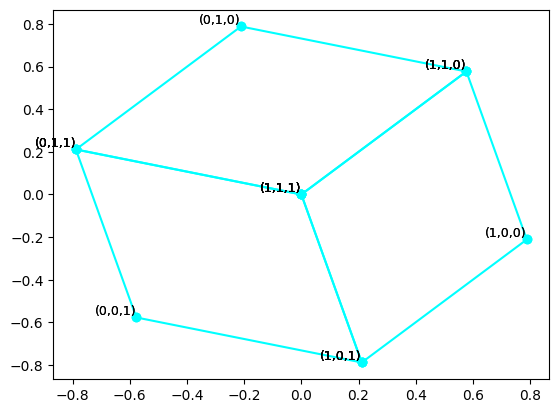

[[0, 0, 0], [0, 0, 1]]


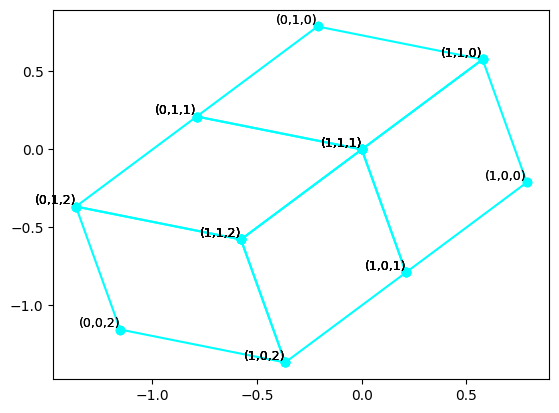

[[0, 0, 0], [0, 1, 0]]


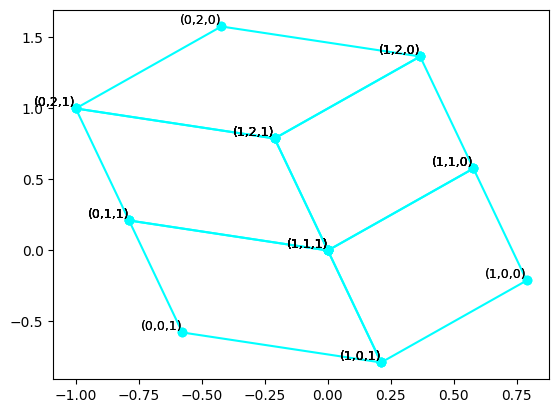

[[0, 0, 0], [1, 0, 0]]


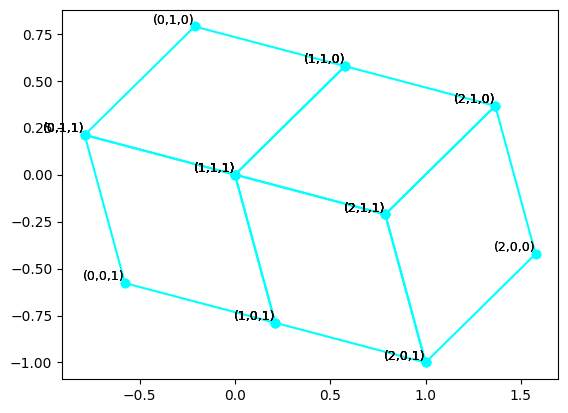

In [76]:
for i in range(1,len(master_pi)):
  for pi in master_pi[i]:
    print(pi)
    fig, ax = plt.subplots()
    prints_image_of_partition(pi, fig, ax)


In [77]:
def given_partition_and_height_determines_initial_conditions(partition, height):
  #set everything in the space to 0
  initial_conditions = []

  for i in range(height):
    initial_conditions.append([])
    for j in range(height):
      initial_conditions[i].append([])
      for k in range(height):
        initial_conditions[i][j].append(0)
  # so now all coordinats have value of 0

  # here we make some coordinates equal to 1
  for box in partition:
    a,b,c=box
    if [a,b,c+1] not in partition:
      initial_conditions[a][b][c+1]=1
      initial_conditions[a][b+1][c+1]=1
      initial_conditions[a+1][b][c+1]=1
      initial_conditions[a+1][b+1][c+1]=1
    if [a,b+1,c] not in partition:
      initial_conditions[a][b+1][c]=1
      initial_conditions[a][b+1][c+1]=1
      initial_conditions[a+1][b+1][c]=1
      initial_conditions[a+1][b+1][c+1]=1
    if [a+1,b,c] not in partition:
      initial_conditions[a+1][b][c]=1
      initial_conditions[a+1][b][c+1]=1
      initial_conditions[a+1][b+1][c]=1
      initial_conditions[a+1][b+1][c+1]=1
    #mission complete!
  return(initial_conditions)




In [78]:
def given_initial_conditions_and_height_determines_grove_poly(conditions, height):
  cg=conditions
  #add in a, b, c variables
  a=[]
  for j in range(height):
    a.append([])
    for k in range(height):
      a[j].append(sp.symbols('a'+str(j)+str(k)))
  b=[]
  for i in range(height):
    b.append([])
    for k in range(height):
      b[i].append(sp.symbols('b'+str(i)+str(k)))
  c=[]
  for i in range(height):
    c.append([])
    for j in range(height):
      c[i].append(sp.symbols('c'+str(i)+str(j)))

  while cg[0][0][0]==0:
    for i in range(height-1):
      for j in range(height-1):
        for k in range(height-1):
          if (cg[i][j][k]==0) and (cg[i+1][j][k]!=0) and (cg[i][j+1][k]!=0) and (cg[i][j][k+1]!=0):
            cg[i][j][k]=(b[i][k]*c[i][j]*cg[i+1][j][k]*cg[i][j+1][k+1]+c[i][j]*a[j][k]*cg[i][j+1][k]*cg[i+1][j][k+1]+a[j][k]*b[i][k]*cg[i][j][k+1]*cg[i+1][j+1][k])/cg[i+1][j+1][k+1]
  poly=sp.expand(cg[0][0][0])
  #print(poly)
  return(poly)

In [79]:
# pi = [[0,0,0],[0,0,1]]
# tall = given_partition_determines_height(pi)
# g = given_partition_and_height_determines_initial_conditions(pi, tall)
# f=given_initial_conditions_and_height_determines_grove_poly(g, tall)
# print(f)


In [80]:
def given_partition_prints_grove(pi):
  tall = given_partition_determines_height(pi)
  g = given_partition_and_height_determines_initial_conditions(pi, tall)
  f=given_initial_conditions_and_height_determines_grove_poly(g, tall)
  print(f)
  return(f)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`
1
[[[0, 0, 0]]]
-----------------------------------------------------------------------
[[0, 0, 0]]


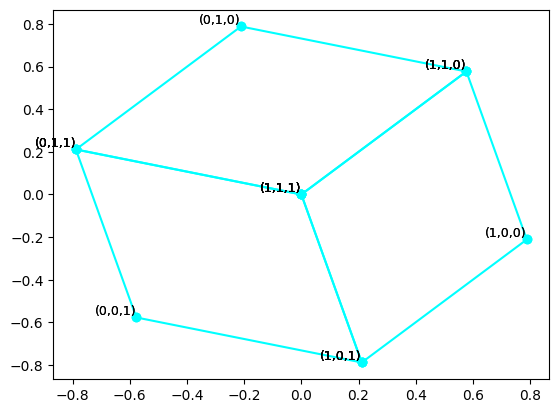

a00*b00 + a00*c00 + b00*c00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`
2
[[[0, 0, 0], [0, 0, 1]], [[0, 0, 0], [0, 1, 0]], [[0, 0, 0], [1, 0, 0]]]
-----------------------------------------------------------------------
[[0, 0, 0], [0, 0, 1]]


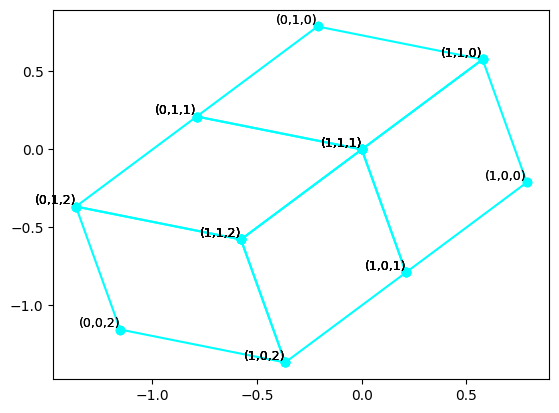

a00*a01*b00*b01 + a00*a01*b00*c00 + a00*b00*b01*c00 + a00*c00 + b00*c00
-----------------------------------------------------------------------
[[0, 0, 0], [0, 1, 0]]


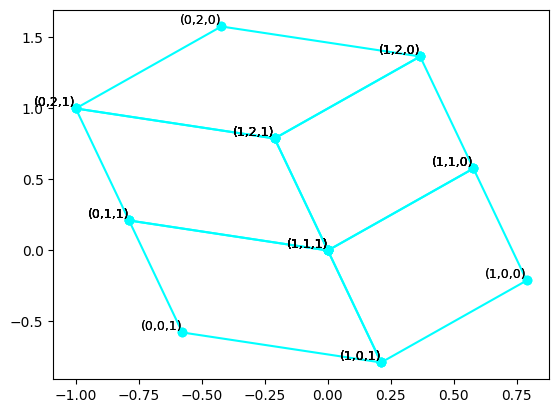

a00*a10*b00*c00 + a00*a10*c00*c01 + a00*b00*c00*c01 + a00*b00 + b00*c00
-----------------------------------------------------------------------
[[0, 0, 0], [1, 0, 0]]


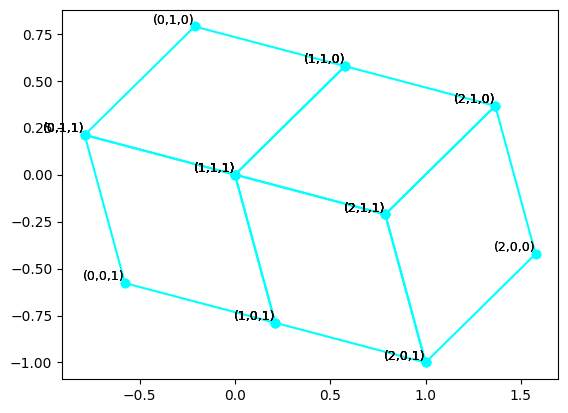

a00*b00*b10*c00 + a00*b00*c00*c10 + a00*b00 + a00*c00 + b00*b10*c00*c10


In [81]:
for i in range(1,len(master_pi)):
  print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`")
  print(i)
  print(master_pi[i])
  for partition in master_pi[i]:
    print("-----------------------------------------------------------------------")
    print(partition)
    fig, ax = plt.subplots()
    prints_image_of_partition(partition, fig, ax)
    given_partition_prints_grove(partition)



In [82]:
##TRYING TO add GROVES TO IMAGE
def takes_partition_prints_groves_over_partition(pi,fig,ax):
  poly =given_partition_prints_grove(pi)
  monomials=poly.as_ordered_terms()
  for monomial in monomials:
    print(monomial)
    ##################################################
    for l in range(len(str(monomial))):
      if l % 4 == 1:
        #print("the relevant coordinates after: "+str(monomial)[l-1]+str(monomial)[l]+str(monomial)[l+1])
        ################################################################################
        if str(monomial)[l-1] == 'a':
          x=0
          y=int(str(monomial)[l])
          z=int(str(monomial)[l+1])
          print("The A coordinates are: ")
          print(x,y,z)
          test = False
          if([x,y,z] not in pi):
            print("SOMETHING IS Wrong!!!")
          while test == False:
            if ([x,y,z] in pi) and ([x+1,y,z] not in pi):
              test = True
            elif ([x,y,z] in pi) and ([x+1,y,z] in pi):
              x+=1
          adds_green_segment_from_3(x,y-1,z,x,y,z-1)
          #######################################################################
        if str(monomial)[l-1] == 'b':
          x=int(str(monomial)[l])
          y=0
          z=int(str(monomial)[l+1])
          print("The B coordinates are: ")
          print(x,y,z)
          test=False
          if([x,y,z] not in pi):
            print("THIS SIME THING IS BAD!!!")
          while test == False:
            if([x,y,z] in pi) and ([x,y+1,z] not in pi):
              test = True
            elif ([x,y,z] in pi) and ([x,y+1,z] in pi):
              y+=1
          adds_green_segment_from_3(x-1,y,z,x,y,z-1)
          ###########################################################3#############
        if str(monomial)[l-1] == 'c':
          x=int(str(monomial)[l])
          y=int(str(monomial)[l+1])
          z=0
          print("The C coordinates are: ")
          print(x,y,z)
          text=False
          if ([x,y,z] not in pi):
            print("whoops-a-daisy")
          while test == False:
            if ([x,y,z] in pi) and ([x,y,z+1] not in pi):
              test = True
            elif([x,y,z] in pi) and ([x,y,z+1] in pi):
              z+=1
          adds_green_segment_from_3(x-1,y,z,x,y-1,z)
    ###########################################
    plt.show()

In [83]:

# # for i in range(len(master_pi)):
# #   for part in master_pi[i]:
# #     print(part)
# for i in range(1,len(master_pi)):
#   for part in master_pi[i]:
#     fig, ax = plt.subplots()
#     takes_partition_prints_groves_over_partition(part,fig,ax)
#     print("should be an image here:")
#     plt.show()
# #adds grove coordinates
#     print("hello bob, I haven't seen you for so long!")



In [84]:
#see if we can get this one to take in a partition, and returna list of monomials

def takes_partition_returns_list_of_monomials(pi):
  poly =given_partition_prints_grove(pi)
  monomials=poly.as_ordered_terms()
  for monomial in monomials:
    print(monomial)
  print(monomials)
  return(monomials)

In [85]:
#see if we can take a partition and a particular monomial, and then print a grove


In [88]:
for i in range(1,len(master_pi)):
  for partition in master_pi[i]:
    pile_of_monos = takes_partition_returns_list_of_monomials(partition)
    print("For the partition "+str(master_pi[i]))
    print("We have the monomials")
    for j in range(len(pile_of_monos)):
      print(pile_of_monos[j])

a00*b00 + a00*c00 + b00*c00
a00*b00
a00*c00
b00*c00
[a00*b00, a00*c00, b00*c00]
For the partition [[[0, 0, 0]]]
We have the monomials
a00*b00
a00*c00
b00*c00
a00*a01*b00*b01 + a00*a01*b00*c00 + a00*b00*b01*c00 + a00*c00 + b00*c00
a00*a01*b00*b01
a00*a01*b00*c00
a00*b00*b01*c00
a00*c00
b00*c00
[a00*a01*b00*b01, a00*a01*b00*c00, a00*b00*b01*c00, a00*c00, b00*c00]
For the partition [[[0, 0, 0], [0, 0, 1]], [[0, 0, 0], [0, 1, 0]], [[0, 0, 0], [1, 0, 0]]]
We have the monomials
a00*a01*b00*b01
a00*a01*b00*c00
a00*b00*b01*c00
a00*c00
b00*c00
a00*a10*b00*c00 + a00*a10*c00*c01 + a00*b00*c00*c01 + a00*b00 + b00*c00
a00*a10*b00*c00
a00*a10*c00*c01
a00*b00*c00*c01
a00*b00
b00*c00
[a00*a10*b00*c00, a00*a10*c00*c01, a00*b00*c00*c01, a00*b00, b00*c00]
For the partition [[[0, 0, 0], [0, 0, 1]], [[0, 0, 0], [0, 1, 0]], [[0, 0, 0], [1, 0, 0]]]
We have the monomials
a00*a10*b00*c00
a00*a10*c00*c01
a00*b00*c00*c01
a00*b00
b00*c00
a00*b00*b10*c00 + a00*b00*c00*c10 + a00*b00 + a00*c00 + b00*b10*c00*c10
a00*